<center><h3>Air Quality Data in India (2015-2020)</h3></center>

##### Overview

This notebook analyzes the **city\_day** dataset from the *Air Quality Data Set* on Kaggle. The dataset provides daily air quality measurements for multiple Indian cities over the period **2015–2020**. It includes pollutant concentrations, calculated AQI values, and their corresponding categorical buckets.

The objective of this notebook is to clean and preprocess the data, analyze air quality trends, and categorize air quality using government-defined AQI standards.


##### Dataset Information

* **Source:** [Kaggle – Air Quality Data Set](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)
* **File Used:** `city_day.csv`
* **Coverage Period:** 2015–2020
* **Granularity:** Daily observations
* **Key Columns:**

  - `City`: City name
  - `Date`: Observation date
  - `PM2.5`, `PM10`, `NO`, `NO2`, `NOx`, `NH3`, `CO`, `SO2`, `O3`, `Benzene`, `Toluene`, `Xylene`: Pollutant concentrations
  - `AQI`: Air Quality Index value
  - `AQI_Bucket`: Categorization of AQI


##### AQI Ranges and Categories (as per CPCB, Govt. of India)

| AQI Range | Category     |
| --------- | ------------ |
| 0–50      | Good         |
| 51–100    | Satisfactory |
| 101–200   | Moderate     |
| 201–300   | Poor         |
| 301–400   | Very Poor    |
| 401+      | Severe       |



##### About Pollutants

* **PM2.5, PM10**: Particulate matter affecting air quality and health.
* **NO, NO₂, NOx**: Nitrogen oxides from combustion, contribute to smog.
* **NH₃**: Ammonia, reacts to form particulates.
* **CO**: Carbon monoxide from incomplete combustion.
* **SO₂**: Sulfur dioxide, linked to acid rain and respiratory issues.
* **O₃**: Ground-level ozone, harmful component of smog.
* **Benzene, Toluene, Xylene**: Volatile organic compounds from vehicles/industry.


In [82]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

> AQI_BUCKET using AQI values & ranges given by govt.

In [83]:
def assign_aqi_bucket(aqi):
    if pd.isnull(aqi):
        return np.nan
    elif aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

In [84]:
city_day = pd.read_csv("./datasets/city_day.csv")

In [85]:
city_day.shape

(29531, 16)

In [86]:
city_day.sample(5 , random_state=42)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
22593,Mumbai,2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22459,Mumbai,2016-08-27,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24213,Patna,2016-05-15,58.50,NaN,11.23,17.05,28.29,NaN,1.14,5.13,24.20,0.14,0.64,0.31,137.0,Moderate
25301,Patna,2019-05-08,78.57,NaN,6.85,5.45,5.57,NaN,1.33,39.86,71.68,1.88,16.32,6.97,190.0,Moderate
20886,Lucknow,2017-11-06,200.80,NaN,40.04,50.59,60.42,35.47,1.22,9.71,42.18,0.15,1.19,NaN,339.0,Very Poor


In [87]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [88]:
pollutant_columns = [
    "PM2.5",
    "PM10",
    "NO",
    "NO2",
    "NOx",
    "NH3",
    "CO",
    "SO2",
    "O3",
    "Benzene",
    "Toluene",
    "Xylene",
]

In [89]:
city_day[pollutant_columns].describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [90]:
city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [91]:
cities = city_day["City"].unique()
print("No. of cities:", cities.shape[0])

No. of cities: 26


In [92]:
city_day["City"].value_counts()

City
Ahmedabad             2009
Bengaluru             2009
Chennai               2009
Mumbai                2009
Lucknow               2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: count, dtype: int64

<Axes: xlabel='AQI_Bucket'>

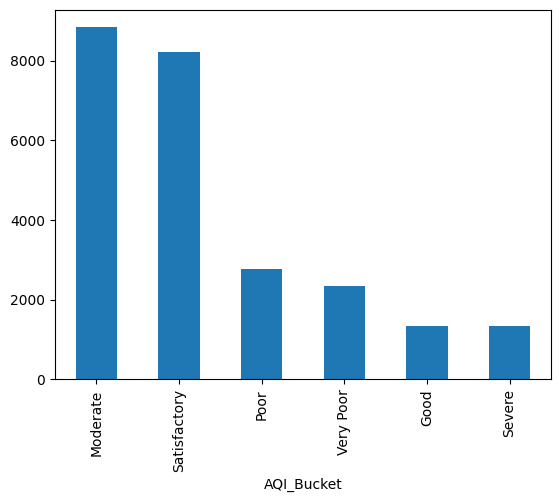

In [125]:
city_day["AQI_Bucket"].value_counts().plot(kind="bar")

Issues in the date that needs to be processed. These are:

1. Missing Values: Several columns, including the target column, have missing values.
2. Correction Values: Some data values needs to be coverted for easy calcualtion and processes.
3. Outliers: Data needs to be cleaned for better predictions
4. Erroneous : Data needs to be cleaned from the errors.

### Processing data

1. Droping rows not having AQI values

In [94]:
city_day.dropna(subset=["AQI"] , inplace=True)

In [95]:
city_day.shape

(24850, 16)

In [96]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   PM10        17764 non-null  float64
 4   NO          24463 non-null  float64
 5   NO2         24459 non-null  float64
 6   NOx         22993 non-null  float64
 7   NH3         18314 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24245 non-null  float64
 10  O3          24043 non-null  float64
 11  Benzene     21315 non-null  float64
 12  Toluene     19024 non-null  float64
 13  Xylene      9478 non-null   float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


2. Converting date column to pandas datetime for temporal feature extraction

In [97]:
city_day["Date"] = pd.to_datetime(city_day["Date"])

city_day["Month"] = city_day["Date"].dt.month
city_day["Day"] = city_day["Date"].dt.day
city_day["Year"] = city_day["Date"].dt.year

3. Outlier Treatment

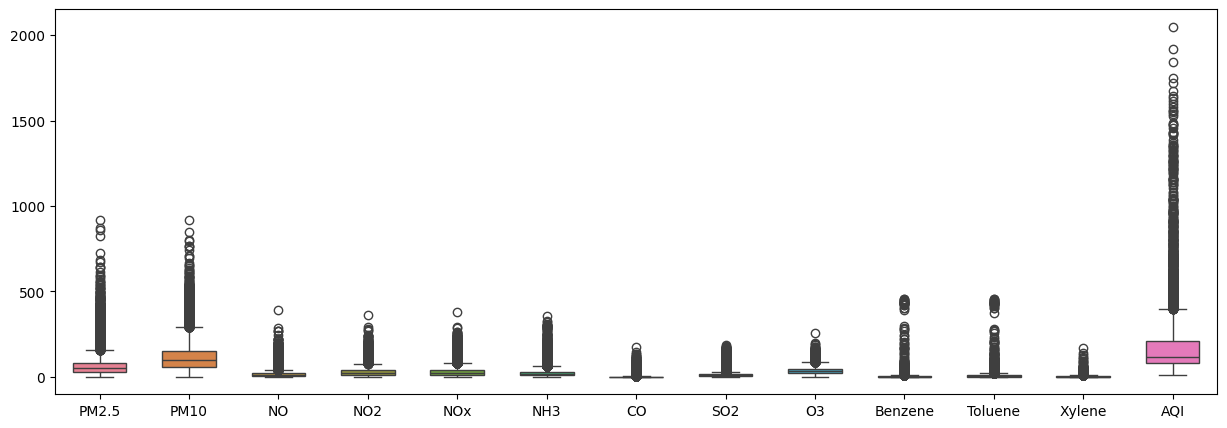

In [98]:
plt.figure(figsize=(15, 5))  
sns.boxplot(data=city_day[pollutant_columns + ["AQI"]],width=0.6)
plt.show()

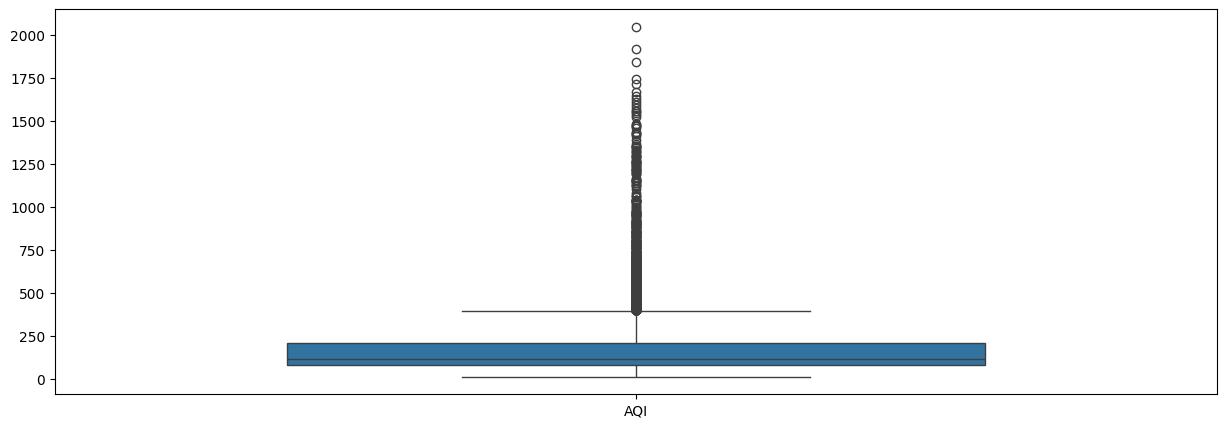

In [99]:
plt.figure(figsize=(15, 5))  
sns.boxplot(data=city_day[[ 'AQI']],width=0.6)
plt.show()

AQI has alot of outliers affecting the analysis as ahemdabad has AQI > 500 in certain places

In [100]:
def replace_outliers_with_quartiles(city_data):
    for column in pollutant_columns + ["AQI"]:
        Q1 = city_data[column].quantile(0.25)
        Q3 = city_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        city_data[column] = city_data[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return city_data

In [101]:
city_day = replace_outliers_with_quartiles(city_day)
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Day,Year
28,Ahmedabad,2015-01-29,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14,209.0,Poor,1,29,2015
29,Ahmedabad,2015-01-30,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81,328.0,Very Poor,1,30,2015
30,Ahmedabad,2015-01-31,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67,208.0,Severe,1,31,2015
31,Ahmedabad,2015-02-01,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12,208.0,Severe,2,1,2015
32,Ahmedabad,2015-02-02,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12,208.0,Severe,2,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,6,27,2020
29527,Visakhapatnam,2020-06-28,24.380,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,6,28,2020
29528,Visakhapatnam,2020-06-29,22.910,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,6,29,2020
29529,Visakhapatnam,2020-06-30,16.640,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,6,30,2020


In [102]:
city_day[pollutant_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,55.260713,32.910786,0.04,29.0000,48.785,80.921250,158.80
PM10,17764.0,105.338640,60.235533,0.03,56.7775,96.180,150.180625,289.95
NO,24463.0,12.517884,8.955014,0.03,5.6600,9.910,20.030000,41.58
NO2,24459.0,25.972275,17.006150,0.01,11.9400,22.100,38.240000,77.68
NOx,22993.0,26.756914,17.712288,0.00,13.1100,23.680,40.170000,80.72
NH3,18314.0,20.013266,13.893247,0.01,8.9600,16.310,30.360000,62.45
CO,24405.0,1.004899,0.576547,0.00,0.5900,0.930,1.480000,2.81
SO2,24245.0,10.300662,5.819469,0.01,5.7300,9.220,15.140000,29.22
O3,24043.0,33.274368,18.033165,0.01,19.2500,31.250,46.080000,86.29
Benzene,21315.0,1.859195,1.862739,0.00,0.2300,1.290,3.340000,8.00


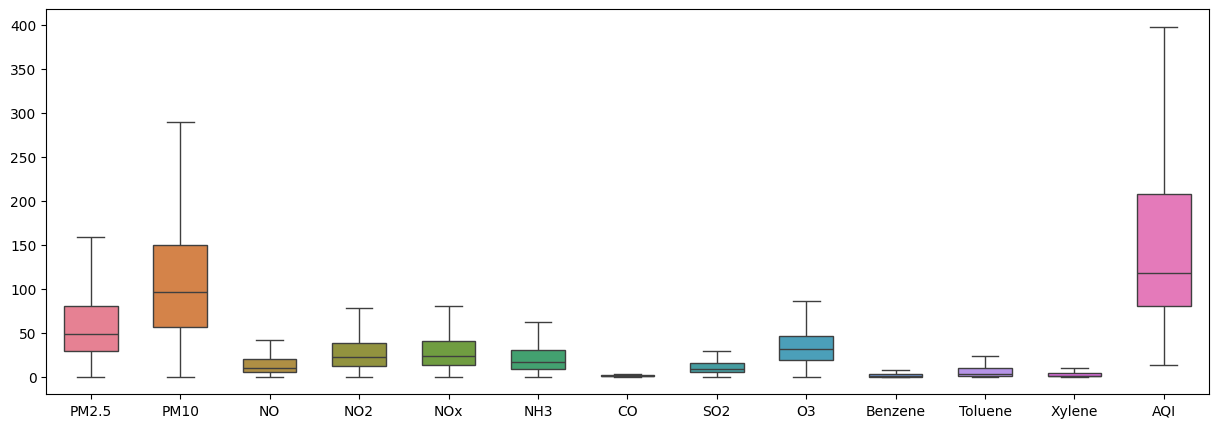

In [103]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=city_day[pollutant_columns + ["AQI"]], width=0.6)
plt.show()

4. Null values treatment

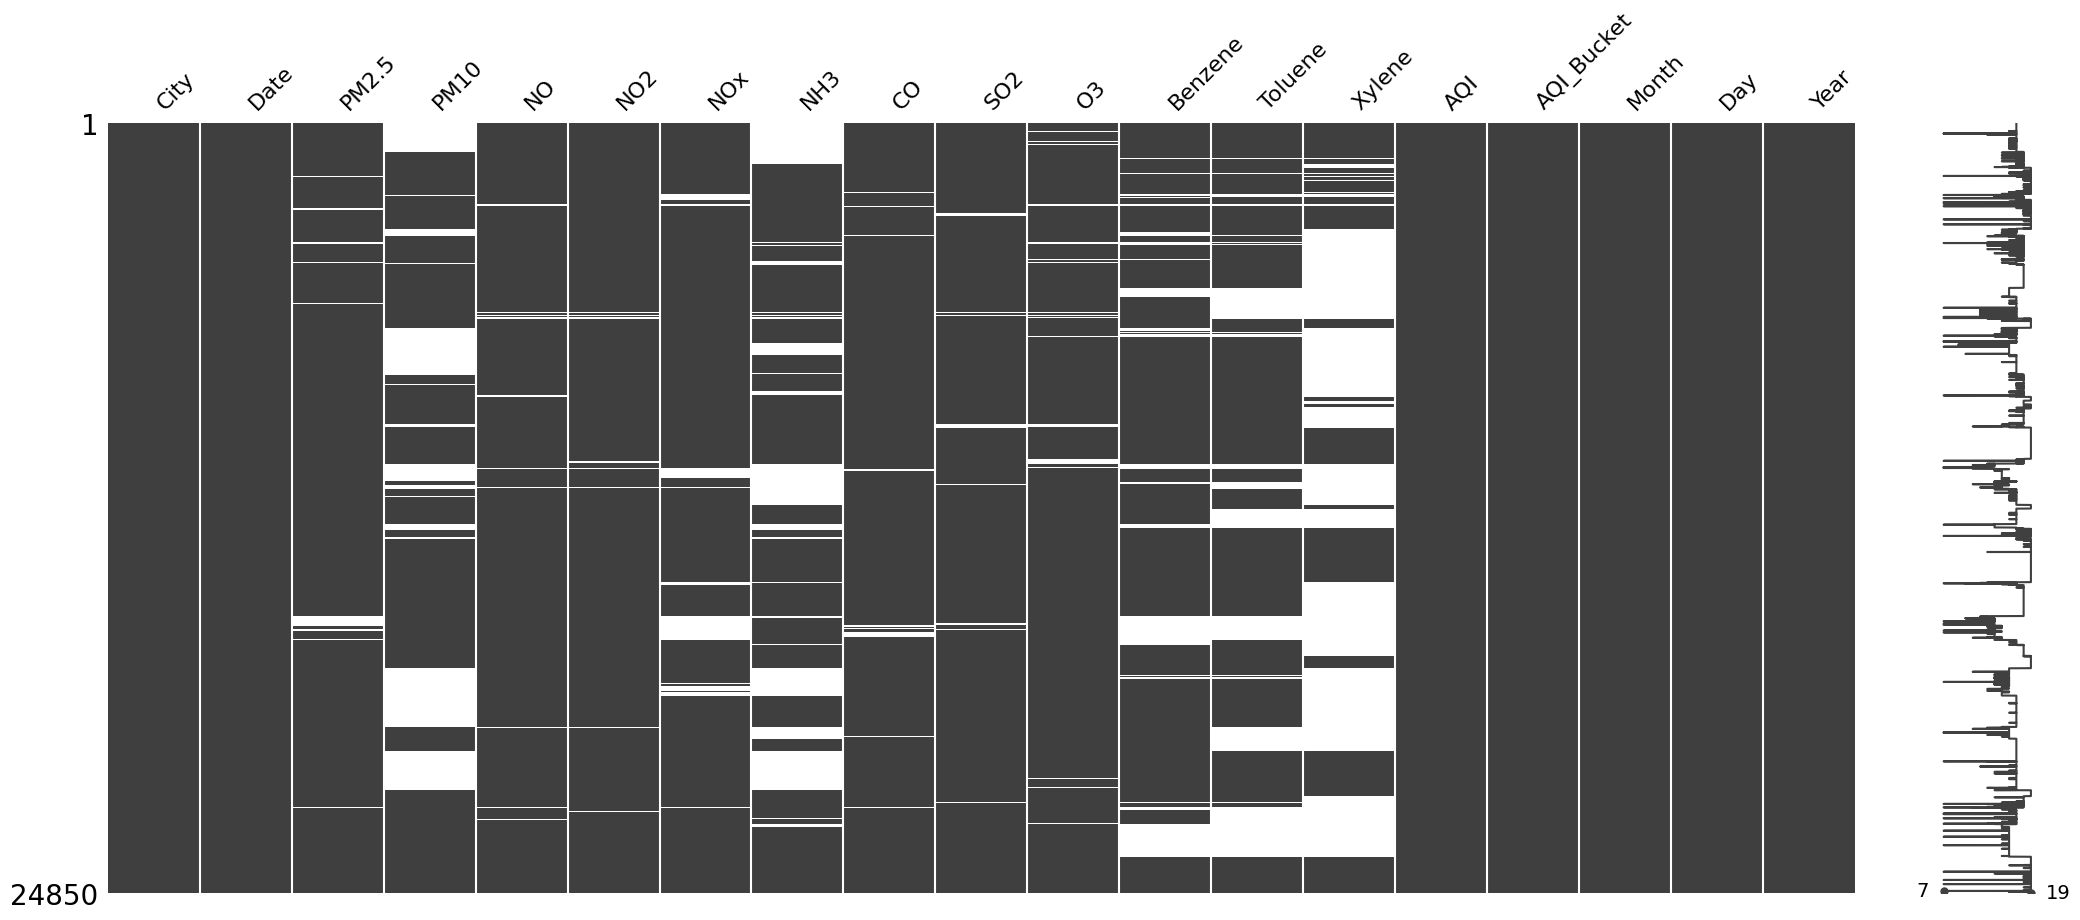

In [104]:
import missingno
missingno.matrix(city_day)
plt.show()

> PM2.5 appears to have missing values that are completely at random (MCAR).

In [105]:
from sklearn.impute import SimpleImputer

median_impute_cols = ["PM2.5", "NO", "NO2", "CO", "SO2", "O3"]
sm = SimpleImputer(strategy="median")
city_day[median_impute_cols] = sm.fit_transform(city_day[median_impute_cols])

> Xylene has a high proportion of missing values, so imputing it could introduce bias and distort the analysis; therefore, dropping it entirely is justified.

In [106]:
city_day.drop(columns=["Xylene"] , inplace=True)

In [107]:
pollutant_columns_without_xyl = pollutant_columns.copy()
pollutant_columns_without_xyl.remove("Xylene")

In [108]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

> All remaining numerical columns, which appear to be missing at random (MAR), will be imputed.

In [109]:
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=5),
    n_nearest_features=3,
    random_state=42,
    max_iter=10,
)
imputer.fit(city_day[pollutant_columns_without_xyl], city_day["AQI"])

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



,estimator,RandomForestR..._estimators=5)
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,3
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


In [110]:
city_day[pollutant_columns_without_xyl] = imputer.transform(
    city_day[pollutant_columns_without_xyl]
)

## EDA

#### Trends 

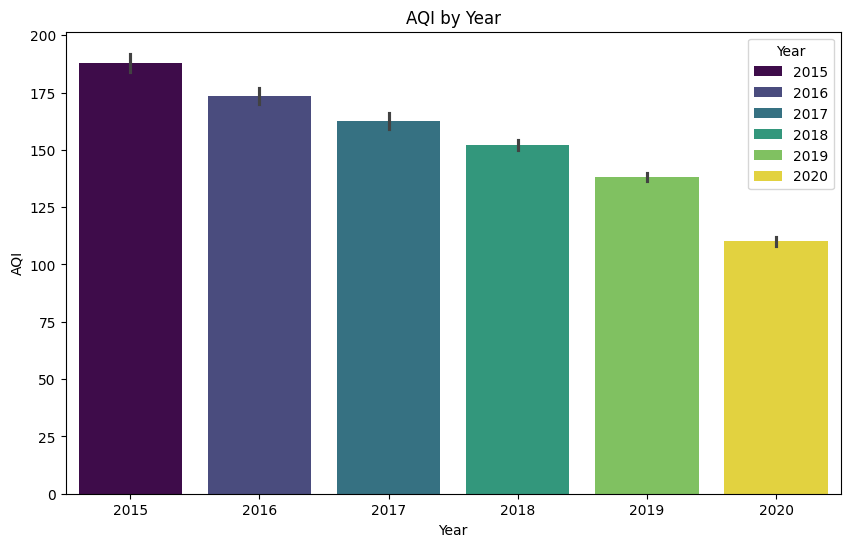

In [111]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Year', y='AQI', data=city_day[["AQI","Year"]], hue="Year" , palette="viridis")

plt.title('AQI by Year')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()

In [112]:
city_day["Year"] = city_day["Date"].dt.year
city_day["Month_Num"] = city_day["Date"].dt.month
city_day["Month_Name"] = city_day["Date"].dt.strftime("%b")

monthly_data = (
    city_day.groupby(["Year", "Month_Num", "Month_Name"])[pollutant_columns_without_xyl]
    .mean(numeric_only=True)
    .reset_index()
)

monthly_long = monthly_data.melt(
    id_vars=["Year", "Month_Num", "Month_Name"],
    value_vars=pollutant_columns_without_xyl,
    var_name="Pollutant",
    value_name="Mean_Value",
)


fig = px.line(
    monthly_long,
    x="Month_Name",
    y="Mean_Value",
    color="Pollutant",
    markers=True,
    facet_row="Year",
    category_orders={
        "Month_Name": [
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ]
    },
    title="Monthly Mean Pollutant Trends by Year",
)


fig.update_layout(
    height=300 * monthly_long["Year"].nunique(),
    width=800,
    legend_title_text="Pollutant",
)
fig.for_each_yaxis(lambda yaxis: yaxis.update(title="Mean Value"))
fig.for_each_xaxis(lambda xaxis: xaxis.update(title="Month"))

fig.show()

1. **Long-term trend:**  The **average PM10 levels are gradually decreasing year by year**, indicating some improvement in air quality over the observed period.

2. **Seasonal peaks:**  **November, December, and January** consistently show the **highest pollution levels**, likely due to winter-related emissions and stagnant air conditions.

3. **Seasonal lows:** **July and August** generally exhibit **lower pollution levels**, possibly due to monsoon rains and stronger winds that help disperse pollutants.



In [113]:
import plotly.graph_objects as go
import pandas as pd

city_day['Month'] = city_day['Date'].dt.to_period('M')
city_day['Year'] = city_day['Date'].dt.year

monthly_aqi = city_day.groupby('Month')['AQI'].mean().reset_index()
annual_aqi_mean = city_day.groupby('Year')['AQI'].mean().mean()

monthly_aqi['Month_Str'] = monthly_aqi['Month'].astype(str)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_aqi['Month_Str'],
    y=monthly_aqi['AQI'],
    mode='lines+markers',
    name='Monthly AQI Average',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=monthly_aqi['Month_Str'],
    y=[annual_aqi_mean]*len(monthly_aqi),
    mode='lines',
    name='Annual AQI Average',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Monthly and Annual Average AQI',
    xaxis_title='Month',
    yaxis_title='AQI',
    xaxis_tickangle=-45,
    width=800,
    height=500,
    template='plotly_white',
    legend=dict(title='Legend')
)

fig.show()


From the graph, we can observe the monthly averages of AQI. The AQI reaches its highest levels in December and January and the lowest levels in June and July, indicating a clear seasonal effect on air quality.

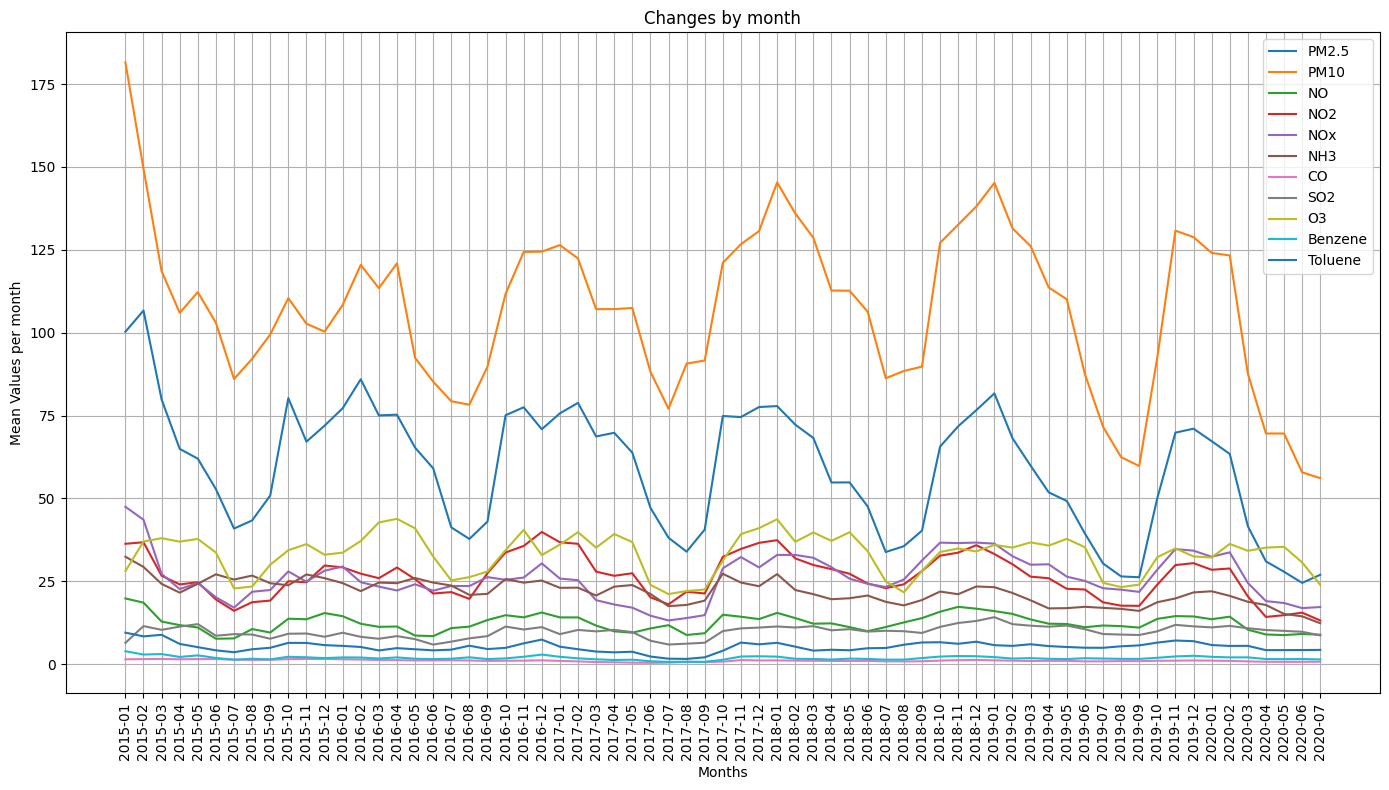

In [114]:
city_day.loc[:,'Month'] = city_day['Date'].dt.to_period('M')
monthly_data = city_day.groupby('Month')[pollutant_columns_without_xyl].mean(numeric_only=True)

plt.figure(figsize=(14, 8))
for col in pollutant_columns_without_xyl:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Months')
plt.ylabel('Mean Values per month')
plt.title('Changes by month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

- The line graph above represents the monthly averages of numerical values from the city_day dataset. The trends observed indicate a clear seasonality in the data.

- During December and January, which correspond to the winter months, the AQI values tend to rise. This increase can be attributed to the higher use of fuels such as coal, wood, heating, and vehicular emissions.

- In contrast, June and July, which coincide with the monsoon season, show a decrease in AQI values. The increased rainfall and stronger winds during this period help disperse pollutants, improving air quality.

#### Identifying Key Features Contributing to AQI

In [115]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [116]:
X, y = city_day[pollutant_columns_without_xyl], city_day["AQI"]

1. Corrleation

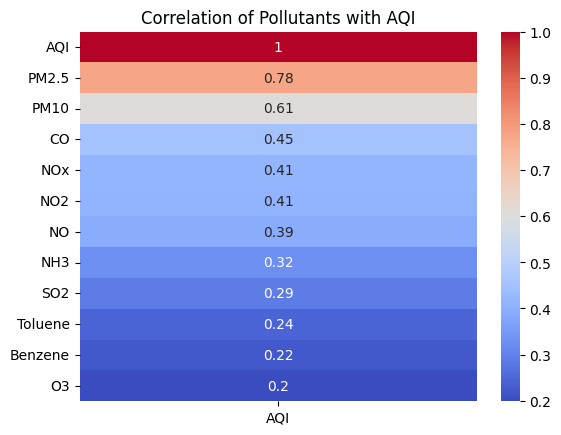

In [117]:
corr = city_day[pollutant_columns_without_xyl + ["AQI"]].corr()
sns.heatmap(
    corr[["AQI"]].sort_values(by="AQI", ascending=False), annot=True, cmap="coolwarm"
)
plt.title("Correlation of Pollutants with AQI")
plt.show()

> From the above figure & common knowledge we can say, while PM2.5 and PM10 are usually the dominant contributors to AQI, CO can also play a significant role in *urban environments* with traffic and combustion sources.

2. Mutual Information

In [118]:
sel = mutual_info_regression(X, y)
mi_scores = pd.DataFrame({'Feature': X.columns, 'MI_Score': sel})
mi_scores.sort_values(ascending=False , by="MI_Score")

,Feature,MI_Score
0,PM2.5,0.782696
1,PM10,0.504809
6,CO,0.272642
4,NOx,0.187463
3,NO2,0.183697
2,NO,0.168227
5,NH3,0.121069
10,Toluene,0.107131
7,SO2,0.106157
8,O3,0.100971


> Using the statistical test like mutual information we can see that PM2.5 and PM10 contribute significantly to AQI

3. Using Embedded method

In [126]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [127]:
pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_}).sort_values(
    ascending=False, by="Importance"
)

,Feature,Importance
0,PM2.5,0.687428
1,PM10,0.081996
6,CO,0.081656
8,O3,0.023415
2,NO,0.021551
3,NO2,0.019036
7,SO2,0.018639
5,NH3,0.018536
4,NOx,0.017681
10,Toluene,0.016923


Across all feature selection techniques, the three key pollutants contributing most significantly to AQI are PM2.5, PM10, and CO.

In [119]:
import math
import plotly.subplots as sp
import plotly.graph_objects as go

cols = ["AQI", "PM2.5", "PM10", "CO"]

n = len(cols)
rows = math.ceil(n / 2)

fig = sp.make_subplots(
    rows=rows,
    cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}] for _ in range(rows)],
    subplot_titles=cols,
)

row, col = 1, 1
for c in cols:
    x = city_day.groupby("City")[c].sum().sort_values(ascending=False).reset_index()
    top_cities = x[:10]

    fig.add_trace(
        go.Pie(
            labels=top_cities["City"],
            values=top_cities[c],
            name=c,
            pull=[0.2] + [0] * (len(top_cities) - 1),
            textinfo="label+percent",
        ),
        row=row,
        col=col,
    )

    if col == 1:
        col = 2
    else:
        row += 1
        col = 1

fig.update_layout(
    title_text="Top 10 Cities by Pollutant Contribution",
    height=400 * rows,
    width=900,
)

fig.show()

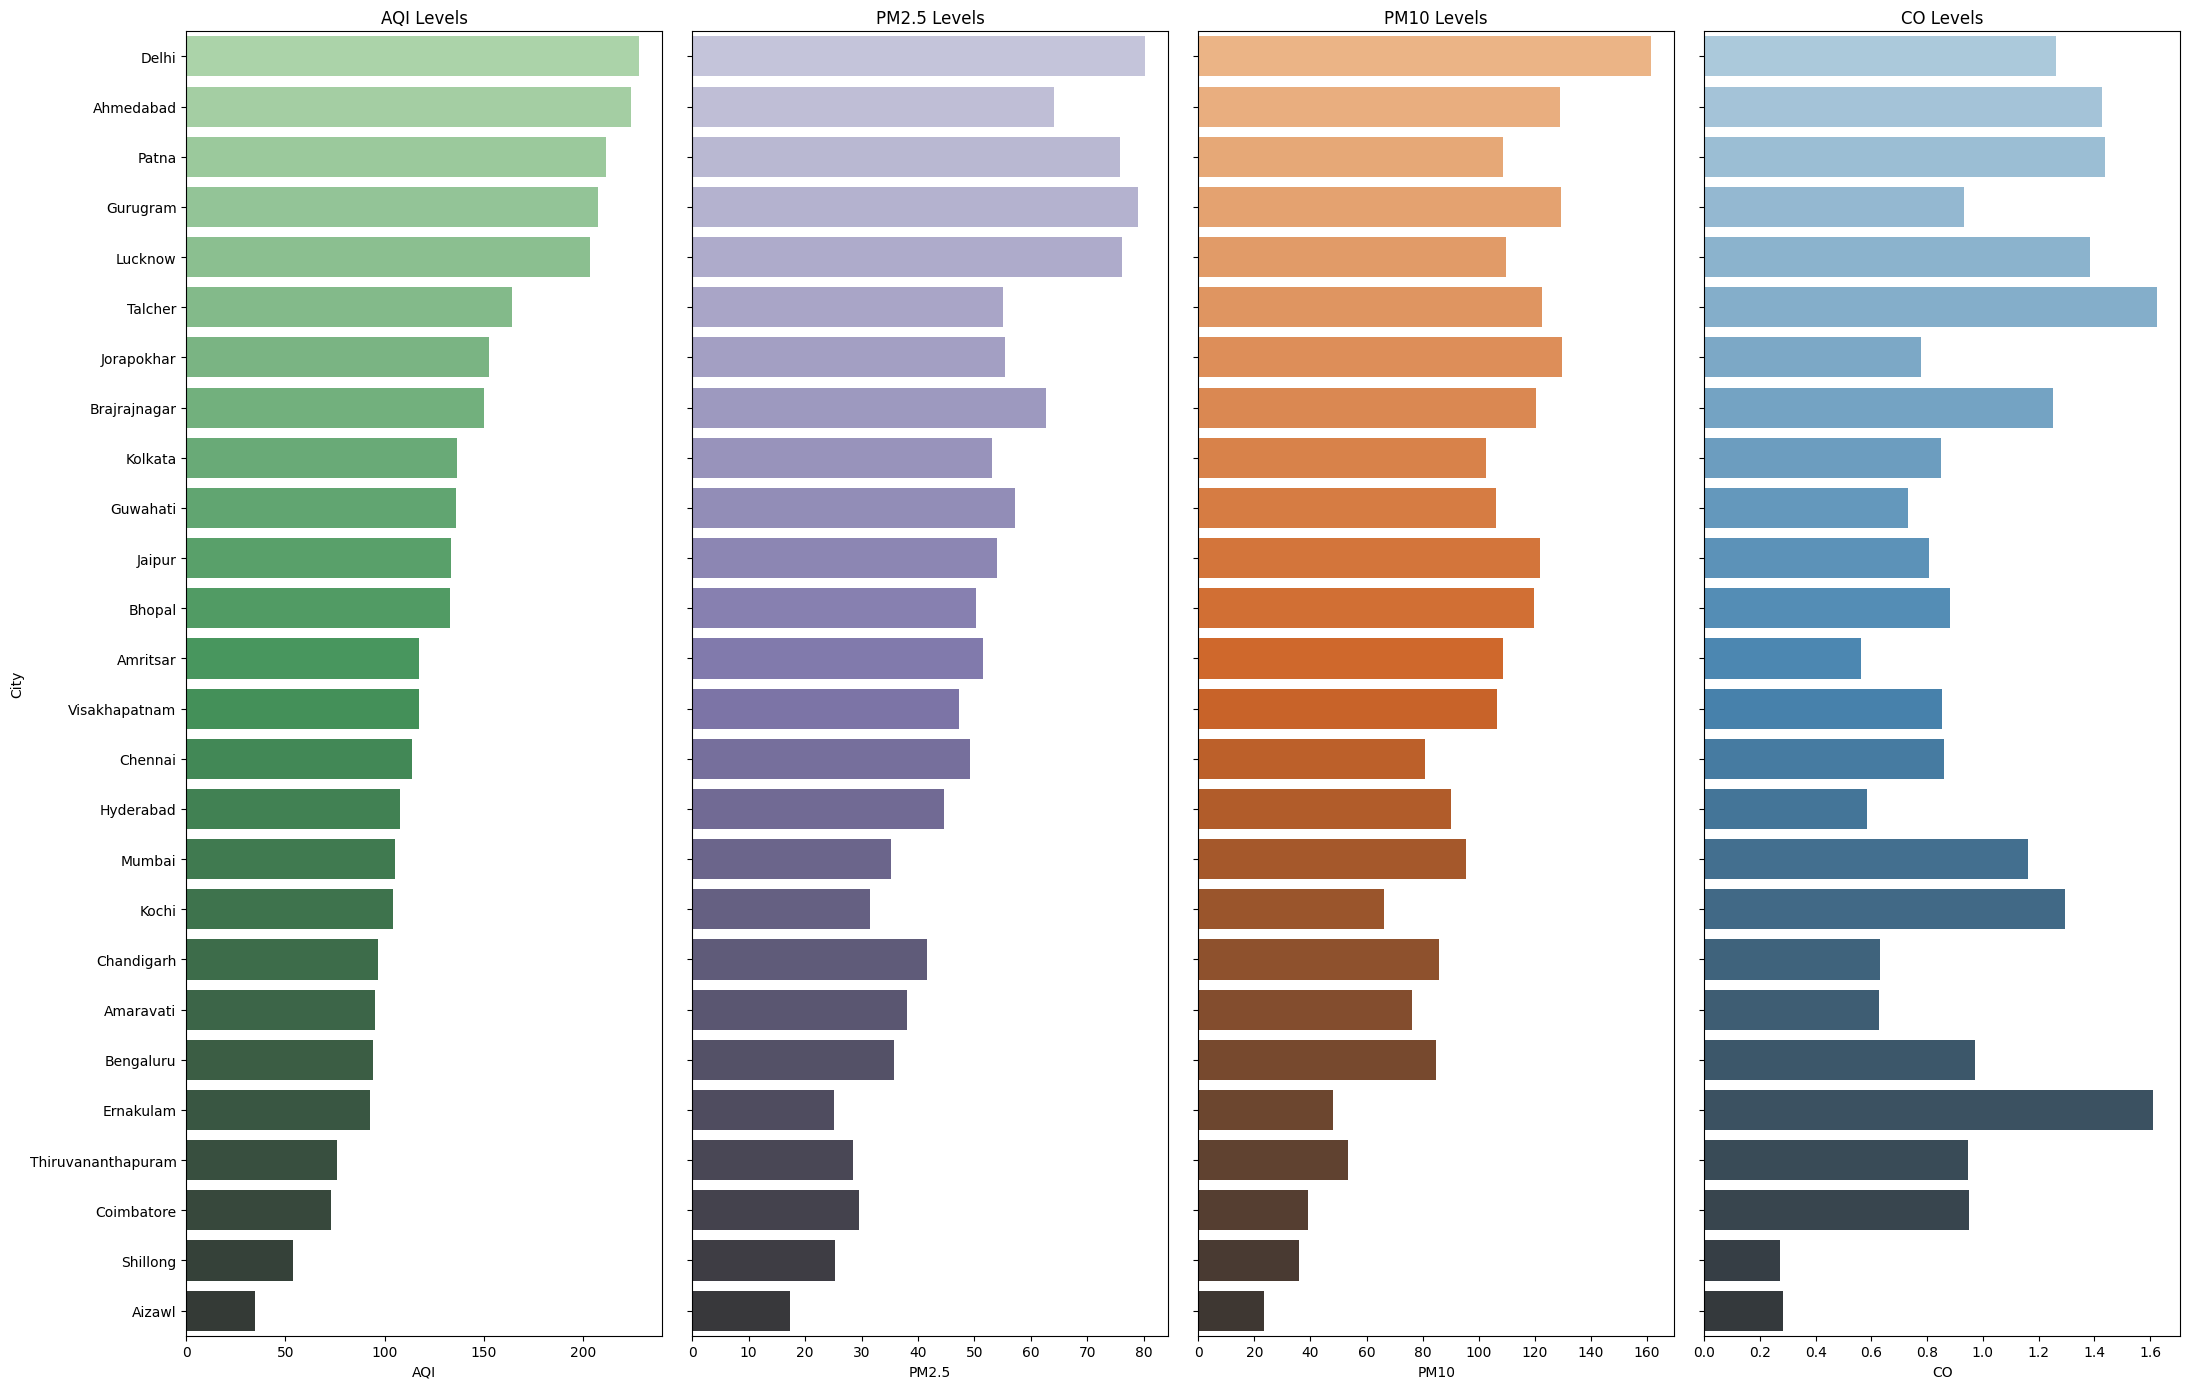

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

all_cities = city_day.groupby("City")[["AQI", "PM2.5", "PM10", "CO"]].mean().sort_values(by="AQI", ascending=False).reset_index()

fig, axes = plt.subplots(1, 4, figsize=(22, 14), sharey=True)

sns.barplot(
    data=all_cities,
    x="AQI", y="City",
    hue="City", dodge=False,
    ax=axes[0], palette="Greens_d", legend=False
)
axes[0].set_title("AQI Levels")

sns.barplot(
    data=all_cities,
    x="PM2.5", y="City",
    hue="City", dodge=False,
    ax=axes[1], palette="Purples_d", legend=False
)
axes[1].set_title("PM2.5 Levels")

sns.barplot(
    data=all_cities,
    x="PM10", y="City",
    hue="City", dodge=False,
    ax=axes[2], palette="Oranges_d", legend=False
)
axes[2].set_title("PM10 Levels")

sns.barplot(
    data=all_cities,
    x="CO", y="City",
    hue="City", dodge=False,
    ax=axes[3], palette="Blues_d", legend=False
)
axes[3].set_title("CO Levels")

plt.tight_layout()
plt.show()


This visualization compares **AQI, PM2.5, PM10, and CO levels across different cities** in a side-by-side manner.

* The **first chart** shows overall **AQI distribution**, highlighting the cities with the poorest air quality.
* The **second and third charts** focus on **PM2.5** and **PM10**, the primary particulate pollutants, showing their dominance in several regions.
* The **fourth chart** highlights **CO levels**.

By placing these charts together, we can clearly observe **correlations and contrasts** between AQI and its major contributing pollutants.
